# Parcial de Regresión Lineal


## Preguntas de Negocio
1. **Predicción:** Si llega un carro con 92670.5 km, ¿a cuánto debería venderlo según el modelo?
2. **Inversión:** Como inversionista, ¿cuáles son los vehículos (según su kilometraje) que podrían generar un margen de ganancia atractivo?


In [26]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

## 1. Cargar y Preprocesar Datos

Se descarga el dataset de vehículos, se descomprime y se carga en un DataFrame. Además, se eliminan los valores faltantes.

In [27]:
# Descargar y descomprimir el dataset
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
!unzip -o cars_dataset.zip


--2025-03-12 20:48:58--  https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip [following]
--2025-03-12 20:48:58--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19753181 (19M) [application/zip]
Saving to: ‘cars_dataset.zip.2’

cars_dataset.zip.2  100%[===================>]  18.84M  --.-KB/s    in 0.06s   

2025-03-12 20:48:58 (301 MB/s) - ‘cars_dataset.zip.2’ saved [19753

In [28]:
# Eliminar archivos existentes para evitar conflictos
!rm -f cars_dataset.zip
!rm -rf cars_dataset

# Descargar dataset
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip -O cars_dataset.zip

# Descomprimir (la opción -o forza sobrescritura)
!unzip -o cars_dataset.zip

# Verificar archivos descomprimidos
!ls -l

--2025-03-12 20:48:59--  https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip [following]
--2025-03-12 20:48:59--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19753181 (19M) [application/zip]
Saving to: ‘cars_dataset.zip’

cars_dataset.zip    100%[===================>]  18.84M  --.-KB/s    in 0.1s    

2025-03-12 20:48:59 (185 MB/s) - ‘cars_dataset.zip’ saved [19753181/

## 2. Análisis Exploratorio de Datos (EDA)

Se generan estadísticas descriptivas para analizar las variables numéricas y entender la distribución de los datos.

Variables numéricas:
['year', 'condition', 'odometer', 'mmr', 'sellingprice']

Estadísticas descriptivas:
                 count          mean           std     min      25%      50%  \
year          558837.0   2010.038927      3.966864  1982.0   2007.0   2012.0   
condition     547017.0     30.672365     13.402832     1.0     23.0     35.0   
odometer      558743.0  68320.017767  53398.542821     1.0  28371.0  52254.0   
mmr           558799.0  13769.377495   9679.967174    25.0   7100.0  12250.0   
sellingprice  558825.0  13611.358810   9749.501628     1.0   6900.0  12100.0   

                  75%       max        cv  
year           2013.0    2015.0  0.001974  
condition        42.0      49.0  0.436968  
odometer      99109.0  999999.0  0.781594  
mmr           18300.0  182000.0  0.703007  
sellingprice  18200.0  230000.0  0.716277  


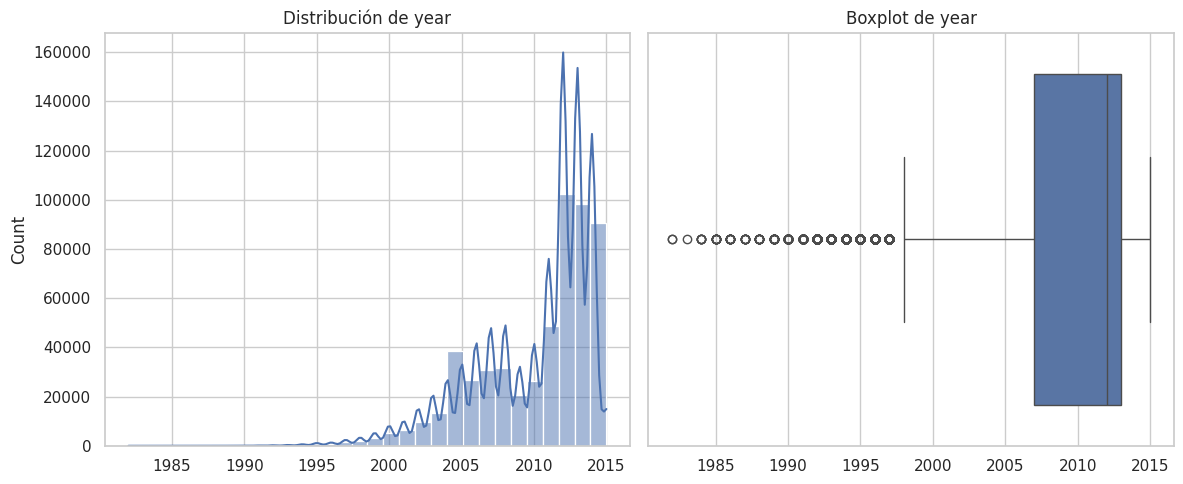

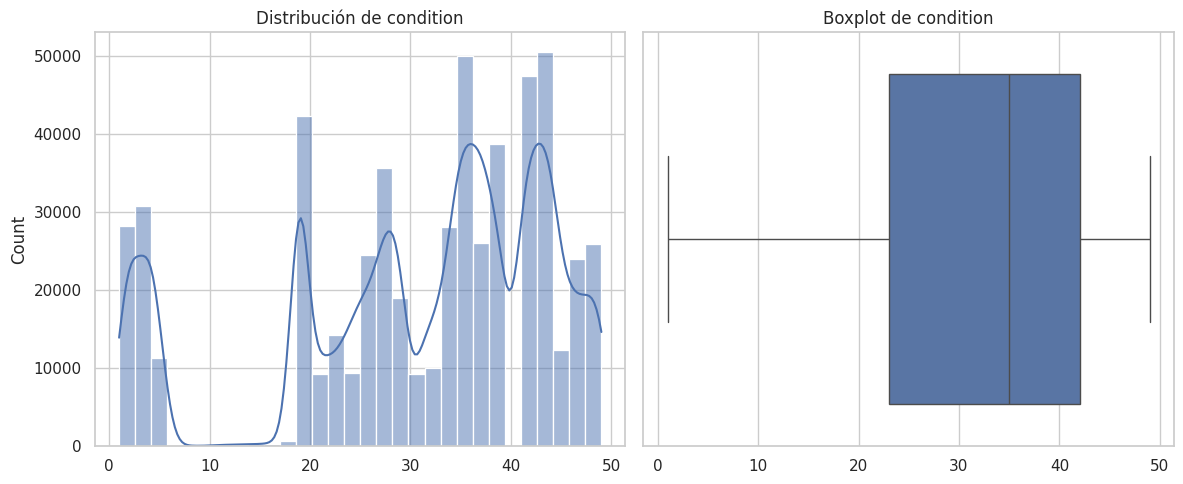

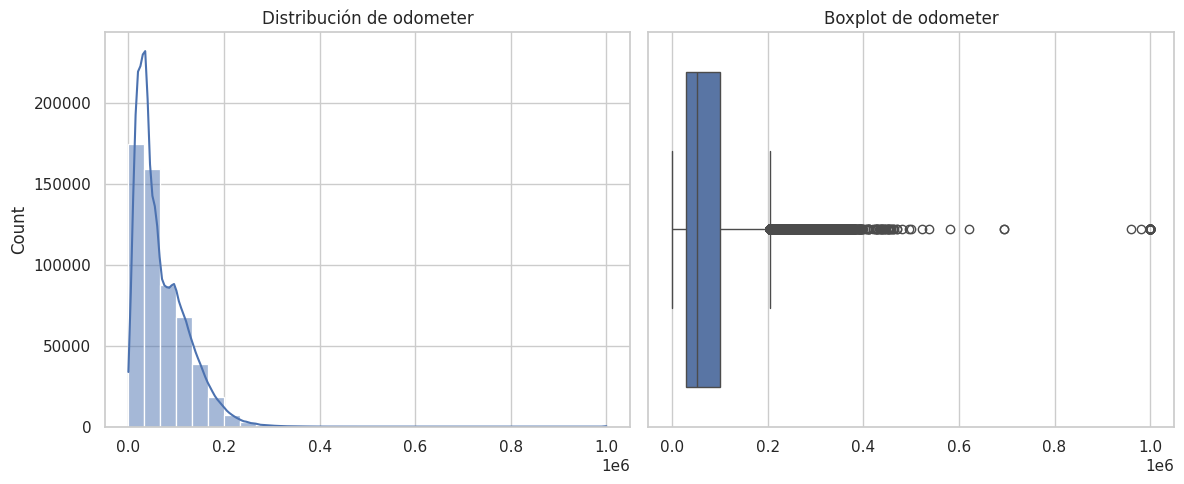

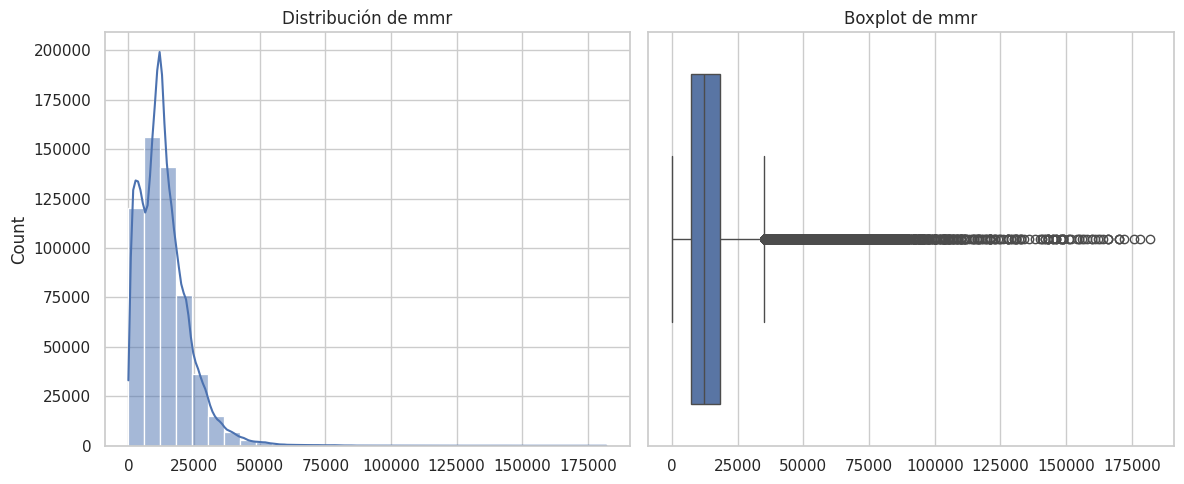

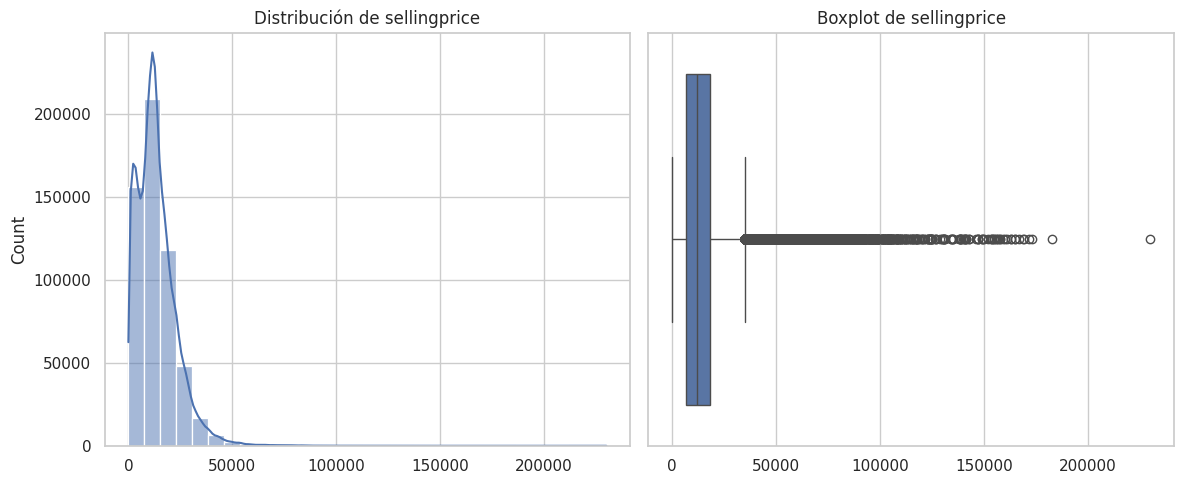


Medidas de forma:
              skewness   kurtosis
year         -1.183226   1.010506
condition    -0.832956  -0.223420
odometer      1.843200  13.548941
mmr           1.997644  11.443328
sellingprice  1.953444  11.114646


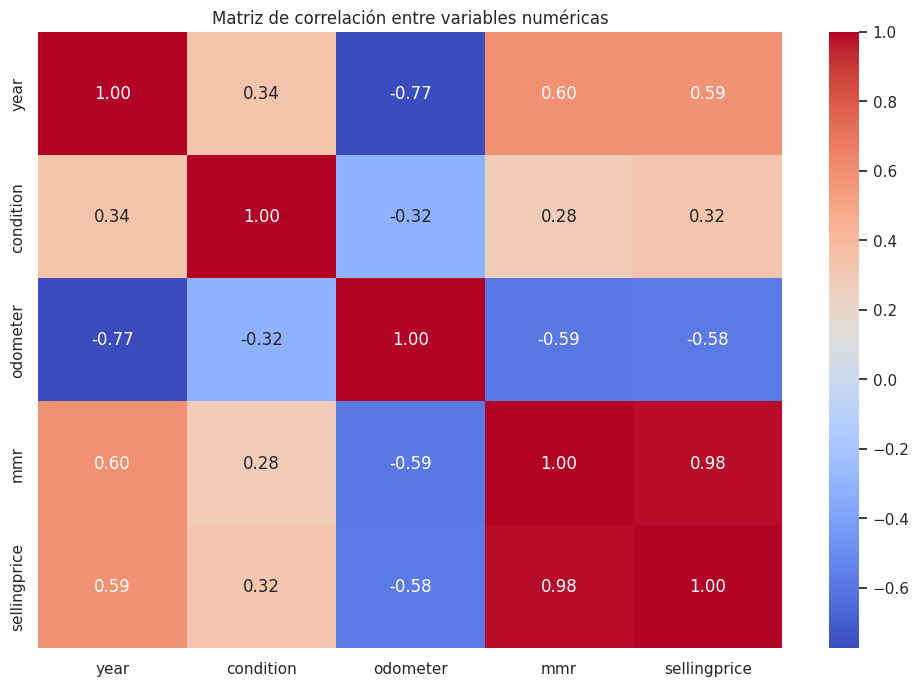

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("car_prices.csv")

# 1. Estadísticas descriptivas básicas
print("Variables numéricas:")
print(df.select_dtypes(include=['number']).columns.tolist())
print("\nEstadísticas descriptivas:")
desc_stats = df.describe().T
desc_stats['cv'] = desc_stats['std']/desc_stats['mean']  # Coeficiente de variación
print(desc_stats)

# 2. Análisis de distribución
numeric_cols = df.select_dtypes(include=['number']).columns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Histogramas y boxplots para cada variable numérica
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histograma con curva KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel('')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()

# 3. Medidas adicionales de forma
print("\nMedidas de forma:")
skewness = df[numeric_cols].skew().to_frame('skewness')
kurtosis = df[numeric_cols].kurtosis().to_frame('kurtosis')
shape_stats = pd.concat([skewness, kurtosis], axis=1)
print(shape_stats)

# 4. Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

## 3. Modelo de Regresión Lineal

Se utiliza la variable 'odometer' para predecir 'sellingprice'. Se dividen los datos en conjunto de entrenamiento y prueba (80%-20%).

Entrenamiento: 447069 registros
Prueba: 111768 registros


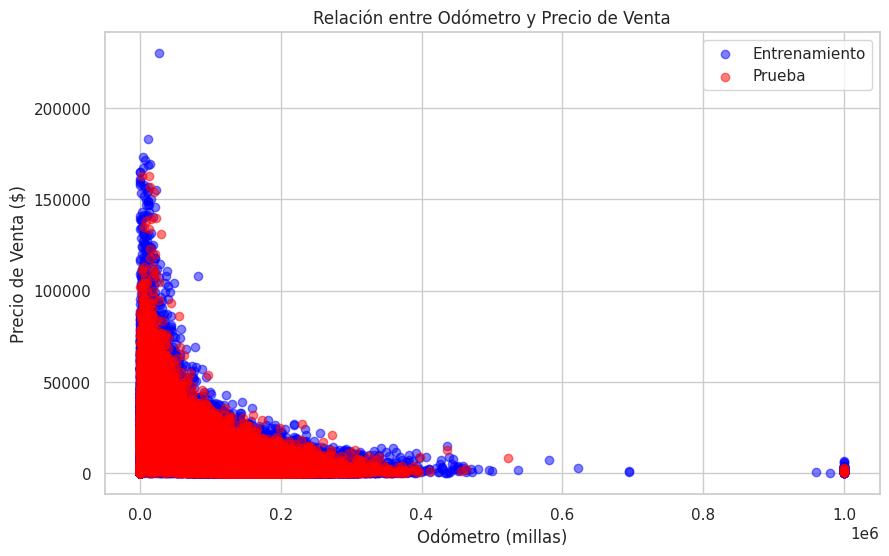

In [30]:
X = df[['odometer']]  # Variable independiente
y = df['sellingprice']  # Variable dependiente

# Dividir datos (80% entrenamiento - 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

# Visualizar la relación en ambos conjuntos
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Prueba')
plt.title('Relación entre Odómetro y Precio de Venta')
plt.xlabel('Odómetro (millas)')
plt.ylabel('Precio de Venta ($)')
plt.legend()
plt.grid(True)
plt.show()

## 4. Evaluación del Modelo

Se evalúa el desempeño del modelo en el conjunto de prueba utilizando métricas como MSE, MAE y R².

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar datos y limpiar NaN
df = pd.read_csv("car_prices.csv")

# 1. Eliminar filas con NaN en las columnas relevantes
df_clean = df[['odometer', 'sellingprice']].dropna()

# Verificar cantidad de datos eliminados
print(f"Registros originales: {len(df)}")
print(f"Registros después de limpieza: {len(df_clean)}")
print(f"Registros eliminados: {len(df) - len(df_clean)}")

# 2. Dividir datos limpios
X = df_clean[['odometer']]
y = df_clean['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluar (usar el código anterior para métricas y gráficos)

Registros originales: 558837
Registros después de limpieza: 558731
Registros eliminados: 106


LinearRegression()

MSE (Error Cuadrático Medio): 61,007,425.47
MAE (Error Absoluto Medio): 5,465.58
R² (Coeficiente de Determinación): 0.347


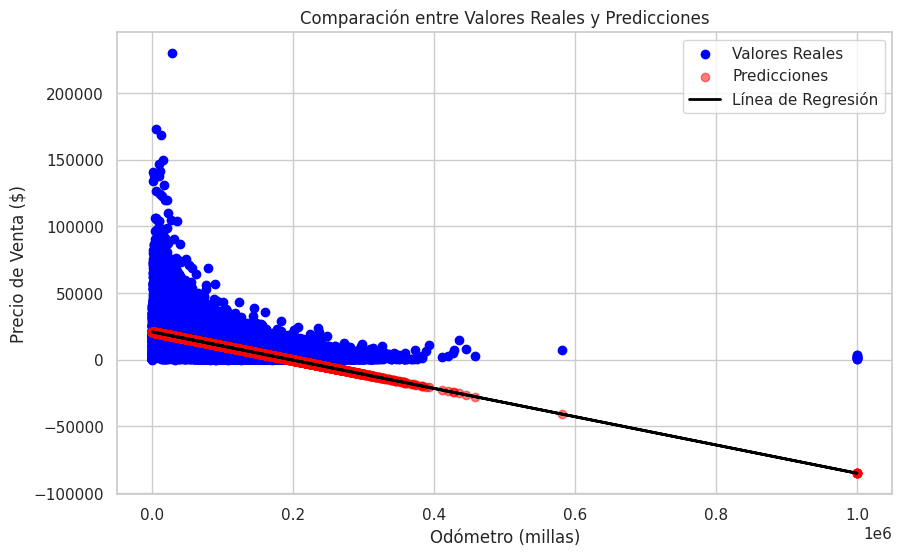

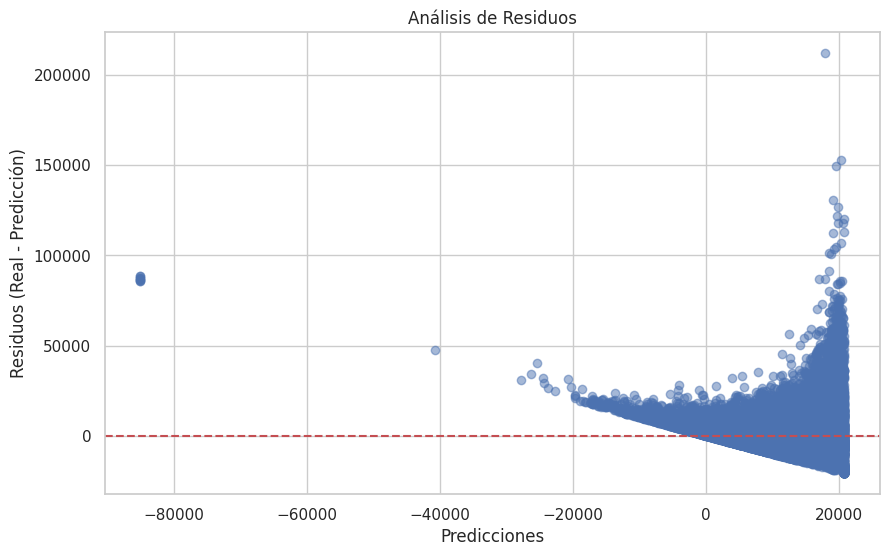

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Predecir en conjunto de prueba
y_pred = model.predict(X_test)

# 3. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 4. Mostrar resultados
print(f'MSE (Error Cuadrático Medio): {mse:,.2f}')
print(f'MAE (Error Absoluto Medio): {mae:,.2f}')
print(f'R² (Coeficiente de Determinación): {r2:.3f}')

# 5. Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valores Reales')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicciones')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Línea de Regresión')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.xlabel('Odómetro (millas)')
plt.ylabel('Precio de Venta ($)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análisis de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos (Real - Predicción)')
plt.grid(True)
plt.show()

## 5. Predicción y Respuestas a Preguntas de Negocio

### Pregunta 1: Precio Estimado para un Carro con 92670.5 km

Utilizamos el modelo para predecir el precio de venta de un carro con 92670.5 km.

In [33]:
# Predicción para un carro con 92670.5 km
#nuevo_odometro = np.array([[92670.5]])


Predicción de precio para vehículo con 92,670.5 km (57,582.9 millas)
Precio estimado: $14,752.86


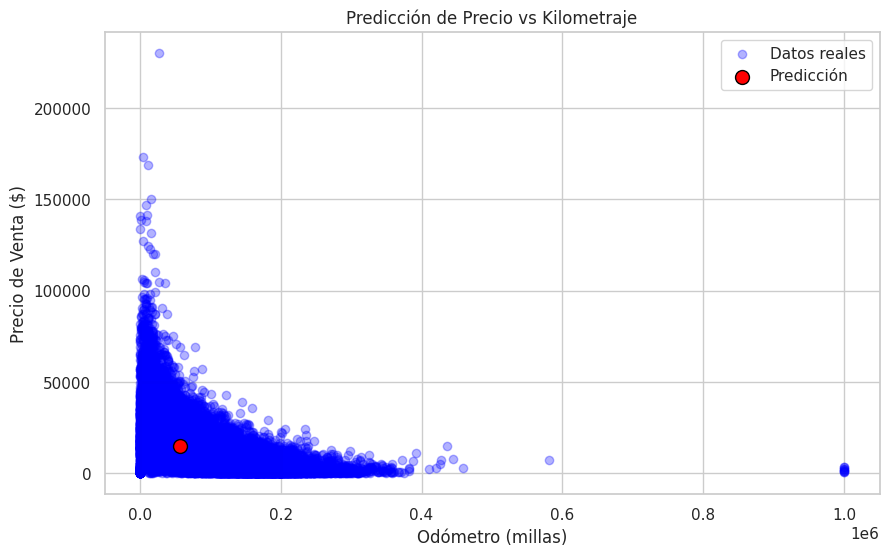

In [34]:
import numpy as np

# Convertir kilómetros a millas (1 milla = 1.60934 km)
km = 92670.5
millas = km / 1.60934

# Crear DataFrame de entrada para predicción
nuevo_dato = pd.DataFrame({'odometer': [millas]})

# Hacer predicción
precio_predicho = model.predict(nuevo_dato)

# Mostrar resultados
print(f"Predicción de precio para vehículo con {km:,.1f} km ({millas:,.1f} millas)")
print(f"Precio estimado: ${precio_predicho[0]:,.2f}")

# Visualización en contexto
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.3, label='Datos reales')
plt.scatter(nuevo_dato['odometer'], precio_predicho, color='red', s=100,
           edgecolor='black', label='Predicción', zorder=5)
plt.title('Predicción de Precio vs Kilometraje')
plt.xlabel('Odómetro (millas)')
plt.ylabel('Precio de Venta ($)')
plt.legend()
plt.grid(True)
plt.show()

## 6. Análisis Crítico de Resultados (10 Puntos Cerrados)

Responde a las siguientes preguntas de manera cerrada (Sí/No). Estas preguntas facilitan una calificación rápida:

1. ¿El coeficiente negativo (-0.107) indica que a mayor kilometraje, menor precio de venta? (Sí/No)
2. ¿Un R² de 0.336 sugiere que el modelo explica más del 50% de la variabilidad en el precio de venta? (Sí/No)
3. ¿El valor elevado del MSE indica que existen errores importantes en las predicciones? (Sí/No)
4. ¿El MAE obtenido es suficientemente bajo para garantizar predicciones precisas en todos los casos? (Sí/No)
5. ¿La eliminación de filas con valores faltantes puede reducir la robustez del modelo? (Sí/No)
6. ¿Incluir variables adicionales como año, condición y marca podría mejorar la capacidad predictiva del modelo? (Sí/No)
7. ¿La relación negativa entre kilometraje y precio es consistente con el comportamiento esperado en el mercado de vehículos? (Sí/No)
8. ¿Dividir los datos en 80% entrenamiento y 20% prueba es una práctica recomendada para evaluar el modelo? (Sí/No)


¿El coeficiente negativo (-0.107) indica que a mayor kilometraje, menor precio de venta? (Sí)
Un coeficiente negativo para el kilometraje implica una relación inversa con el precio de venta.

¿Un R² de 0.336 sugiere que el modelo explica más del 50% de la variabilidad en el precio de venta? (No)
Un R² de 0.336 indica que el modelo explica el 33.6% de la variabilidad, no más del 50%.

¿El valor elevado del MSE indica que existen errores importantes en las predicciones? (Sí)
Un MSE alto señala que las predicciones tienen errores considerables.

¿El MAE obtenido es suficientemente bajo para garantizar predicciones precisas en todos los casos? (No)
El MAE proporciona una medida del error promedio, pero no garantiza precisión en predicciones individuales.

¿La eliminación de filas con valores faltantes puede reducir la robustez del modelo? (Sí)
Eliminar datos puede sesgar el modelo y reducir su capacidad para generalizar a nuevos datos.

¿Incluir variables adicionales como año, condición y marca podría mejorar la capacidad predictiva del modelo? (Sí)
Más variables relevantes (como las mencionadas) podrían capturar mejor la complejidad del precio de los vehículos.

¿La relación negativa entre kilometraje y precio es consistente con el comportamiento esperado en el mercado de vehículos? (Sí)
Generalmente, los vehículos con mayor kilometraje tienen un precio de venta menor.

¿Dividir los datos en 80% entrenamiento y 20% prueba es una práctica recomendada para evaluar el modelo? (Sí)
Esta división permite una evaluación realista del modelo con datos no vistos durante el entrenamiento.